<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import combinations
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline
%config inlineBackend.figure_format = 'retina'


In [2]:
breast_cancer_csv = '/home/gaio/Documents/GitHub/iod-linux/DATA/breast-cancer-wisconsin-data.csv'
breast_cancer = pd.read_csv(breast_cancer_csv, index_col = 'id')
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [3]:
breast_cancer= breast_cancer.drop('Unnamed: 32', axis= 1)

In [4]:
breast_cancer.shape

(569, 31)

In [5]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [6]:
breast_cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

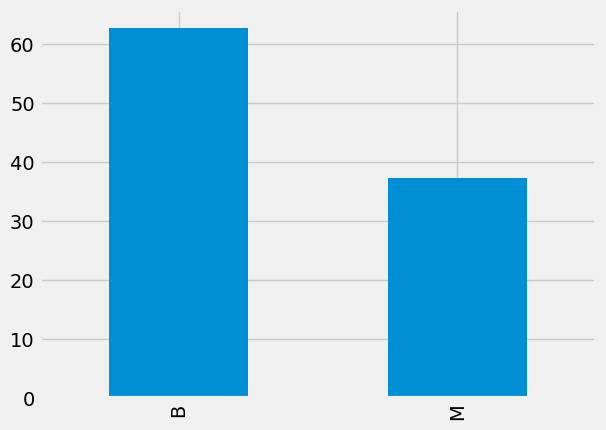

In [7]:
(breast_cancer['diagnosis'].value_counts(normalize=True)*100).plot(kind='bar');

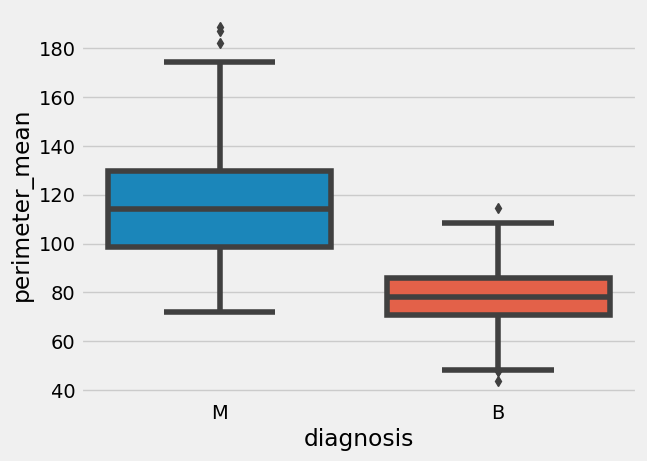

In [8]:
sns.boxplot(x= 'diagnosis', y = 'perimeter_mean', data= breast_cancer);

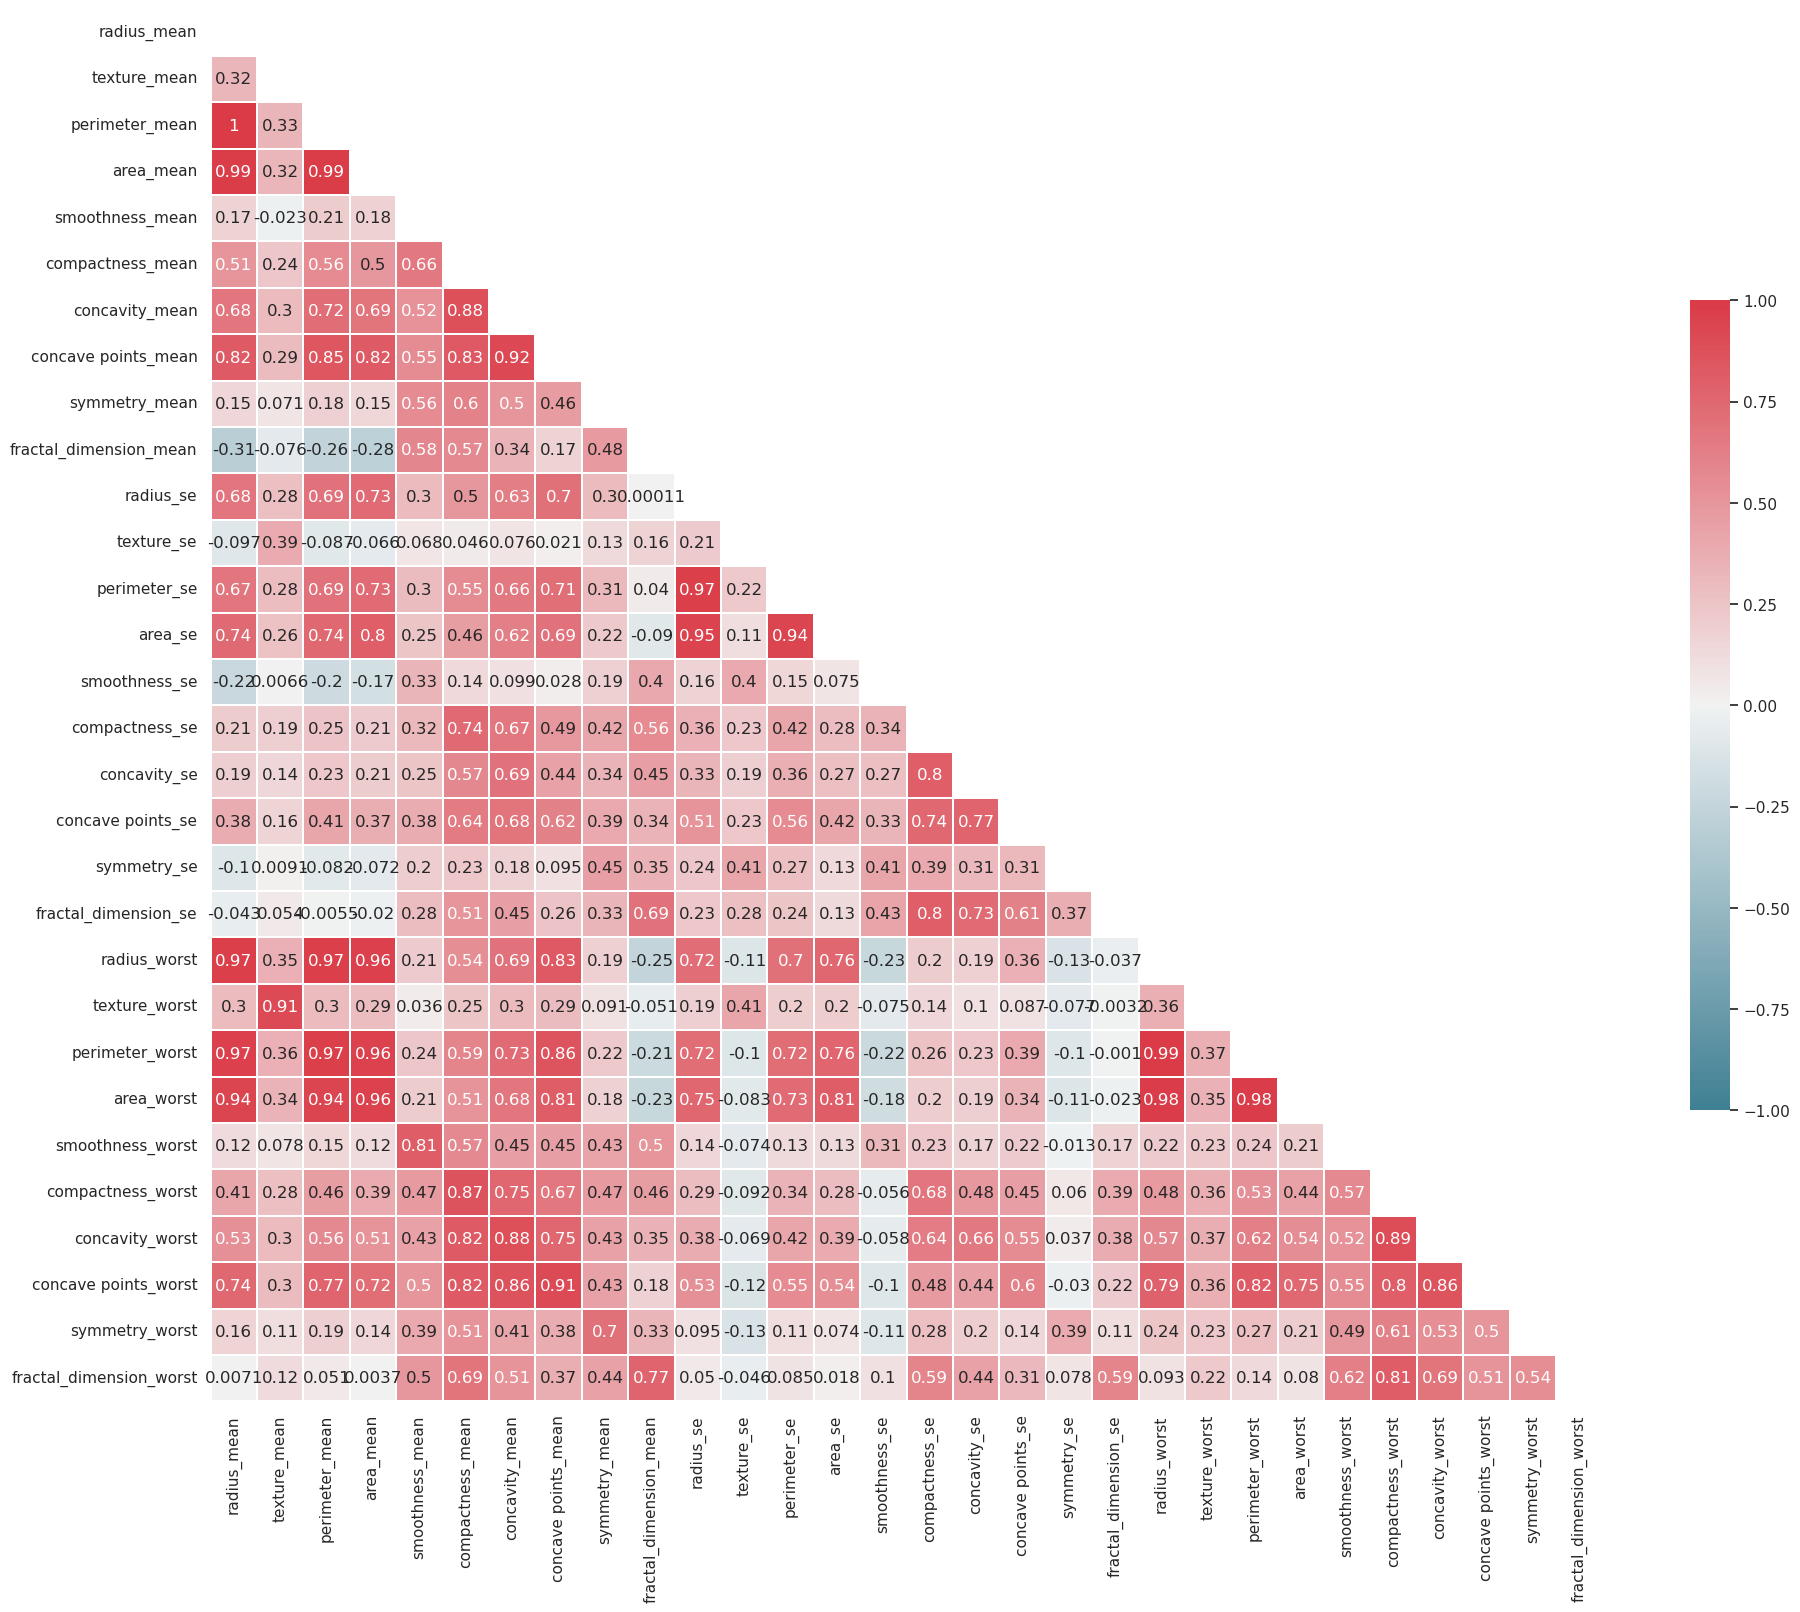

In [9]:
sns.set(style='white')
df_corr = breast_cancer.corr()
sns.set
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] =True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask,cmap=cmap, vmax=1, center=0,vmin = -1,  square=True, linewidths=.05, cbar_kws={'shrink':.5}, annot= 
           True);

In [10]:
breast_cancer.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [11]:
mean_only_columns = []
for column in breast_cancer.columns:
    if 'mean' in column or 'diagnosis' in column:
        mean_only_columns.append(column)
    
print(mean_only_columns)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [ ]:
selected_breast_cancer = breast_cancer[mean_only_columns]
selected_breast_cancer.head(2)

In [49]:
selected_breast_cancer.loc[selected_breast_cancer.diagnosis == 'B', 'diagnosis'] = 0 
selected_breast_cancer.loc[selected_breast_cancer.diagnosis == 'M', 'diagnosis'] = 1

In [51]:
selected_breast_cancer['diagnosis'] = selected_breast_cancer.diagnosis.astype('int64')

/tmp/ipykernel_6820/1008801304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_breast_cancer['diagnosis'] = selected_breast_cancer.diagnosis.astype('int64')


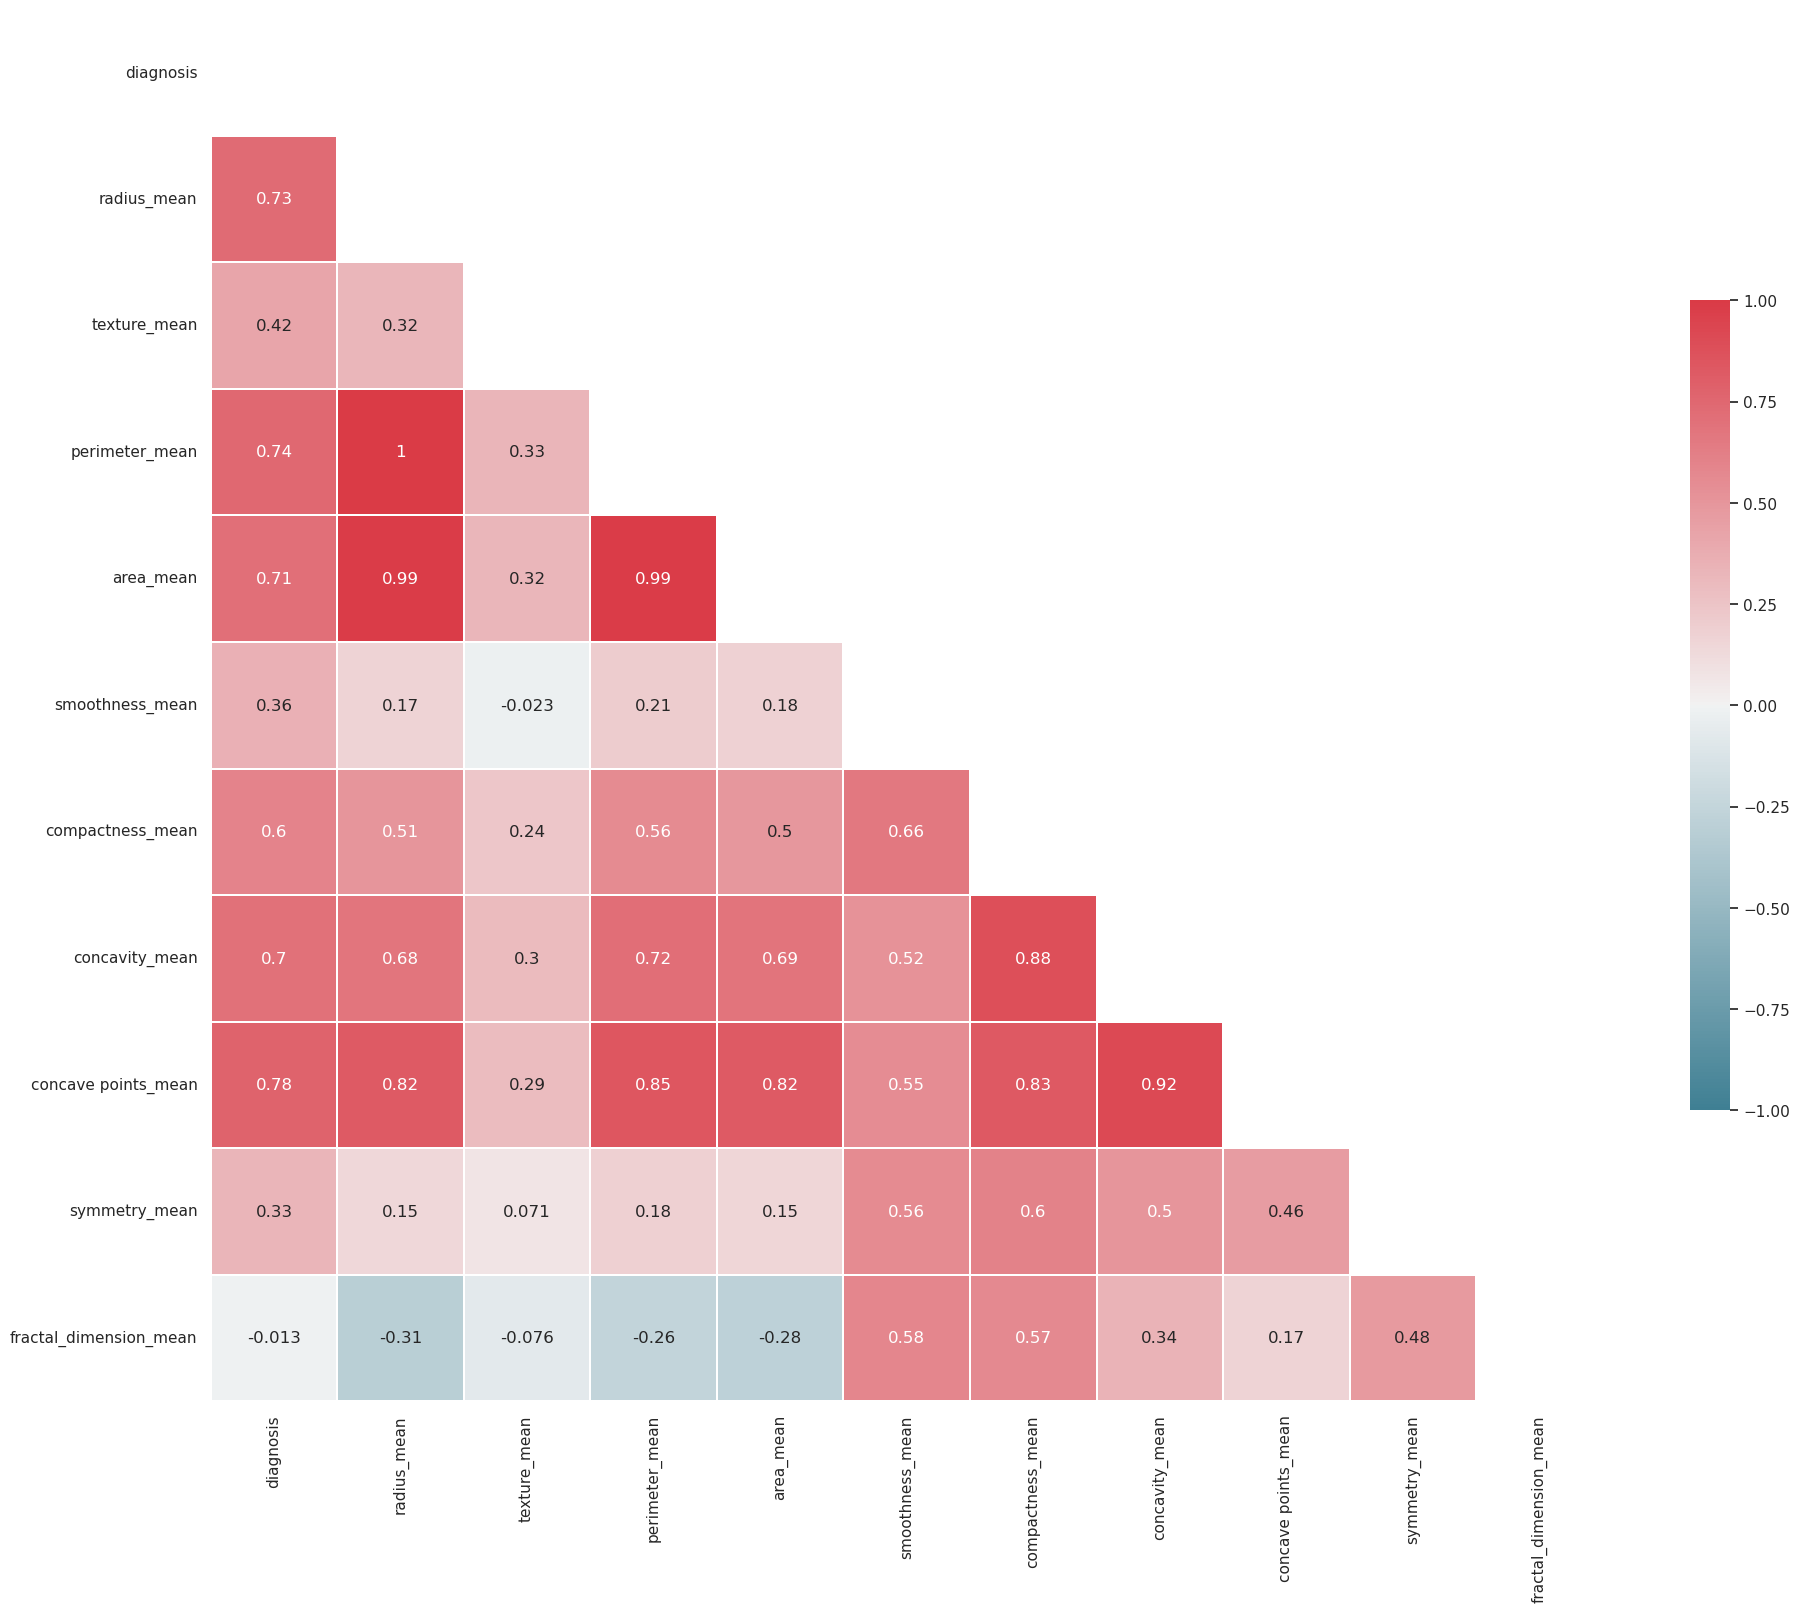

In [52]:
sns.set(style='white')
df_corr = selected_breast_cancer.corr()
sns.set
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] =True
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_corr, mask=mask,cmap=cmap, vmax=1, center=0,vmin = -1,  square=True, linewidths=.05, cbar_kws={'shrink':.5}, annot= 
           True);

area_mean, smoothnes, compactness,symmetry, fractal_dimension_mean



In [14]:
def find_feature_correlations(df):
    """
    find correlations between df features and convert to format
    wwith one feature1 vs feature2 correlation value per row
    
    _Params:_
    
    df: pandas DataFrame, features as columns. All datatypes must be numeric
    
    Returns a pandas DataFrame where a roww contasins one feature1 vs feature 2 correlation value
    """
    
    var1 = []
    var2 = []
    pearsons = []
    pvalues = []
    
    for comb in combinations(df.columns.tolist(), 2):
        
        v1 = comb[0]
        var1.append(v1)
        
        v2 = comb[1]
        var2.append(v2)
        
        p, p_value = stats.pearsonr(df[v1], df[v2])
        pearsons.append(p)
        pvalues.append(p_value)
        
    corr_df = pd.DataFrame({'Feature1': var1,
                            'Feature2': var2,
                            'P' : pearsons,
                            'p-value': pvalues})
                                
    return corr_df
    
    

In [15]:
list(combinations(selected_breast_cancer.columns.tolist(),2))

[('diagnosis', 'radius_mean'),
 ('diagnosis', 'texture_mean'),
 ('diagnosis', 'perimeter_mean'),
 ('diagnosis', 'area_mean'),
 ('diagnosis', 'smoothness_mean'),
 ('diagnosis', 'compactness_mean'),
 ('diagnosis', 'concavity_mean'),
 ('diagnosis', 'concave points_mean'),
 ('diagnosis', 'symmetry_mean'),
 ('diagnosis', 'fractal_dimension_mean'),
 ('radius_mean', 'texture_mean'),
 ('radius_mean', 'perimeter_mean'),
 ('radius_mean', 'area_mean'),
 ('radius_mean', 'smoothness_mean'),
 ('radius_mean', 'compactness_mean'),
 ('radius_mean', 'concavity_mean'),
 ('radius_mean', 'concave points_mean'),
 ('radius_mean', 'symmetry_mean'),
 ('radius_mean', 'fractal_dimension_mean'),
 ('texture_mean', 'perimeter_mean'),
 ('texture_mean', 'area_mean'),
 ('texture_mean', 'smoothness_mean'),
 ('texture_mean', 'compactness_mean'),
 ('texture_mean', 'concavity_mean'),
 ('texture_mean', 'concave points_mean'),
 ('texture_mean', 'symmetry_mean'),
 ('texture_mean', 'fractal_dimension_mean'),
 ('perimeter_mean

In [16]:
cancer_corr = find_feature_correlations(selected_breast_cancer.select_dtypes(np.number))
cancer_corr[cancer_corr['P']  > 0.2]

,Feature1,Feature2,P,p-value
0,radius_mean,texture_mean,0.323782,2.360374e-15
1,radius_mean,perimeter_mean,0.997855,0.000000e+00
2,radius_mean,area_mean,0.987357,0.000000e+00
4,radius_mean,compactness_mean,0.506124,2.414237e-38
5,radius_mean,concavity_mean,0.676764,1.907202e-77
6,radius_mean,concave points_mean,0.822529,4.350747e-141
9,texture_mean,perimeter_mean,0.329533,7.041961e-16
10,texture_mean,area_mean,0.321086,4.124850e-15
12,texture_mean,compactness_mean,0.236702,1.095581e-08
13,texture_mean,concavity_mean,0.302418,1.690749e-13


In [17]:
cancer_corr.sort_values(by='P', ascending = False)

,Feature1,Feature2,P,p-value
1,radius_mean,perimeter_mean,0.997855,0.000000e+00
2,radius_mean,area_mean,0.987357,0.000000e+00
17,perimeter_mean,area_mean,0.986507,0.000000e+00
39,concavity_mean,concave points_mean,0.921391,6.788791e-235
35,compactness_mean,concavity_mean,0.883121,1.623002e-188
21,perimeter_mean,concave points_mean,0.850977,1.047656e-160
36,compactness_mean,concave points_mean,0.831135,1.240590e-146
27,area_mean,concave points_mean,0.823269,1.491019e-141
6,radius_mean,concave points_mean,0.822529,4.350747e-141
20,perimeter_mean,concavity_mean,0.716136,1.322967e-90


### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [18]:
# ANSWER
y = selected_breast_cancer['diagnosis']

### 4. What is the baseline accuracy?

In [19]:
# ANSWER
y.value_counts(normalize= True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

### 5. Choose features to be your predictor variables and set up your X.

In [20]:
# ANSWER
feature_columns = []
excluded_columns = ['diagnosis', 'area_mean', 'radium_mean', 'concavity_mean', 'compact_points_mean']

for column in selected_breast_cancer.columns:
    if column not in excluded_columns:
        feature_columns.append(column)
        
X = selected_breast_cancer[feature_columns]
X.head()

,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,
842302,17.99,10.38,122.80,0.11840,0.27760,0.14710,0.2419,0.07871
842517,20.57,17.77,132.90,0.08474,0.07864,0.07017,0.1812,0.05667
84300903,19.69,21.25,130.00,0.10960,0.15990,0.12790,0.2069,0.05999
84348301,11.42,20.38,77.58,0.14250,0.28390,0.10520,0.2597,0.09744
84358402,20.29,14.34,135.10,0.10030,0.13280,0.10430,0.1809,0.05883


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [21]:
# ANSWER without splitting the data 
# Make an instance of a KNeighborsClassifier object with 1 neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
# fit on the unstandardized data:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [22]:
# ANSWER
y_pred_class = knn.predict(X)
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred_class))
# predict the response values for the observations in X ("test the model")
# store the predicted response values
print(metrics.classification_report(y,y_pred_class))

1.0
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       357
           M       1.00      1.00      1.00       212

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569



In [23]:
metrics.confusion_matrix(y, y_pred_class)

array([[357,   0],
       [  0, 212]])

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [24]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42 , test_size = 0.2)

# STEP 2: train the model on the training set (using K=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9473684210526315


In [25]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[66,  5],
       [ 1, 42]])

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [26]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
k= X_train.shape[0]
# Fit Train Data
knn= KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_class=knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))
# Print accuracy_score

0.6228070175438597


Square root of numner of samples give us the number of ks

In [30]:
np.sqrt(X_train.shape[0])

21.330729007701542

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [27]:
# ANSWER
list(range(1,X_train.shape[0]+1))

# plot test accuracy by number of neighbors:
test_acc =[]
for i in range (1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, y_train)
    test_acc.append(knn.score(X_test, y_test))

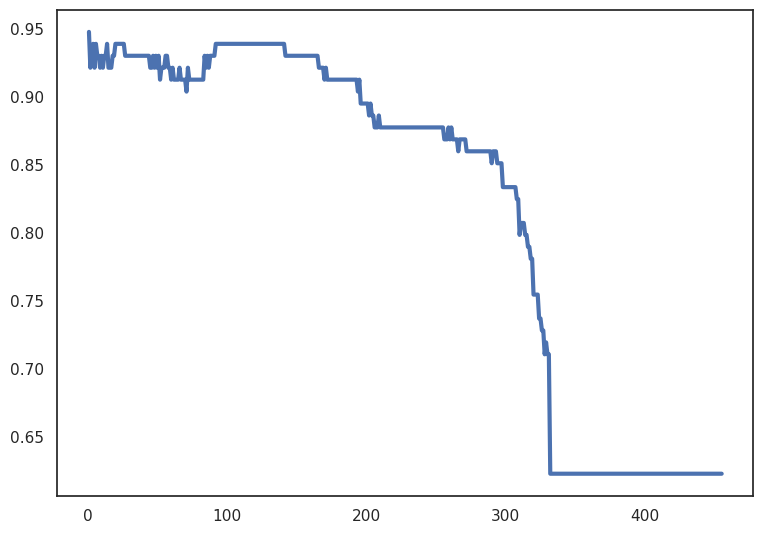

In [29]:
fig, ax =plt.subplots(figsize = (8,6))
ax.plot(list(range(1, X_train.shape[0]+1)), test_acc, lw= 3.)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [39]:
# ANSWER
from sklearn.model_selection import cross_val_score

folds = 5 
max_neighbors= np.floor(X.shape[0]-X.shape[0]/5.)
print(max_neighbors)
test_acc= []
for i in range (1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors= i)
    test_acc.append(np.mean(cross_val_score(knn, X, y, cv= 5)))
print(max(test_acc))

455.0
0.9051234280391244


In [40]:
np.floor(X.shape[0]-X.shape[0]/5.)

455.0

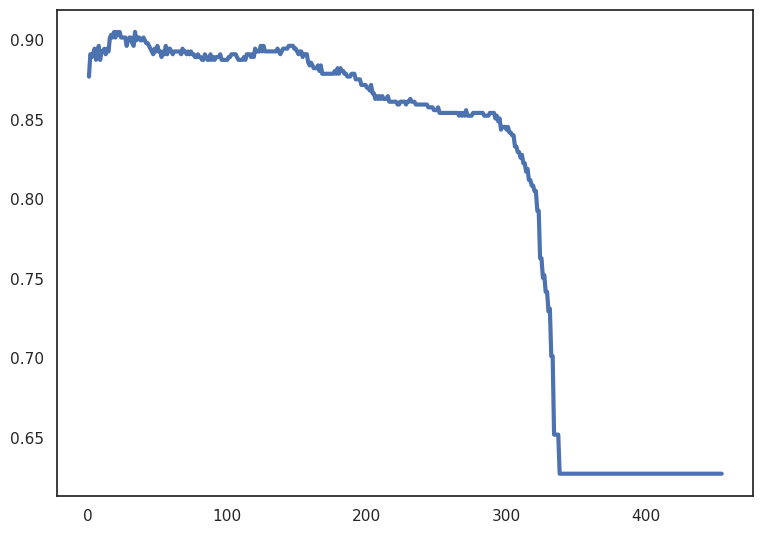

In [41]:
fig, ax =plt.subplots(figsize = (8,6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw= 3.)
plt.show()

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [44]:
# ANSWER
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

# Standarize X

In [45]:
# ANSWER
# plot test accuracy by number of neighbors:
test_acc_std = []
for i in range (1, int(max_neighbors)):
    knn = KNeighborsClassifier(n_neighbors = i)
    test_acc_std.append(np.mean(cross_val_score(knn, Xs, y, cv= 5)))
    
    

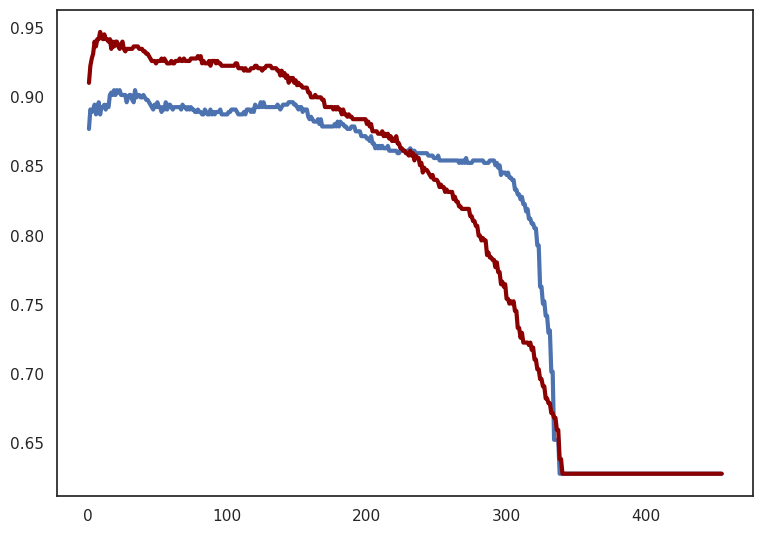

In [48]:
fig, ax = plt.subplots(figsize= (8, 6))
ax.plot(list(range(1, int(max_neighbors))), test_acc, lw= 3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw=3., color= 'darkred');

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



